## Calculating mean, trimmed mean, median, weighted mean and weighted median


• The basic metric for location is the mean, but it can be sensitive to extreme values (outlier).  
• Other metrics (median, trimmed mean) are less sensitive to outliers and unusual distributions and hence are more robust.  

#### The Data

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles

df = pd.read_csv('data/state.csv')
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


#### Mean

In [3]:
df['Population'].mean()

np.float64(6162876.3)

#### Trimmed mean

In [4]:
trim_mean(df['Population'], 0.1) # drop 10% from each end

np.float64(4783697.125)

#### Median

In [5]:
df['Population'].median()

np.float64(4436369.5)

#### Weighted mean

In [6]:
np.average(df['Murder.Rate'], weights=df['Population'])

np.float64(4.445833981123393)

#### Weighted median

In [7]:
wquantiles.median(df['Murder.Rate'], weights=df['Population'])

np.float64(4.4)

## Variability (dispersion)

Variability measures how tightly the data are clustered; how close the values are to each other.  

- **Deviation (error, residual)**: the difference between the measured values and the estimate values.  
- **Variance(szórásnégyzet)**: measures of how spread out data points are from the mean, calculates the average of the squared differences between each observer data point and the mean, so:  
Calculate the difference between the data point and the mean for each data point, then raise them to the power of two individually, then sum those powers up, then divide the sum by (the number of the data point -1):   
$s^2 = \frac{\sum_{i=1}^{N}(x_{i}-\bar{x})^2}{n-1}$  
- **Standard deviation (szórás)**: The square root of the variance.  s= $\sqrt{variance}$  
- **Mean absolute deviation**: The mean of the absolute values of the deviations from the mean = $\frac{\sum_{i=1}^{N}|x_{i}-\bar{x}|}{n-1}$  
- **Median absolute deviation from the median**: The median of the absolute values of the deviations from the median.  
- **Range**: The difference between the largest and the smallest value in a data set.  
- **P percentile**: This is the value at which P% of the data is less than the value, and (100 - P)% is greater than the value (or equal to it).  
e.g. 10%: 10% of the data is less than the value and 90% is greater than (or equal to) the value.  
Median = 50th percentile  
- **Interquartile range (IQR)**: The difference between the 75th percentile and the 25th percentile  

The variance and standard devia‐tion are especially sensitive to outliers.  
A robust estimate of variability is the median absolute deviation from the median or MAD:  
**Median absolute deviation** = $Median(|x_{1} − m|, |x_{2} − m| , ..., |x_{N} − m|)$  
Like the median, the MAD is not influenced by extreme values.

#### Pth Percentile

To find 60th percentile of the data set, say we have 100 data is this set,  order the data, from the lowest to the highest value, then pick the 60th data in this order: that will be the 60th percentile of the data set.  
Note: the 60th percentile is equal to .6 *quantile*.  

#### Standard deviation

In [8]:
import statsmodels

df['Population'].std()


np.float64(6848235.347401142)

#### IQR

In [9]:
df['Population'].quantile(0.75) - df['Population'].quantile(0.25)


np.float64(4847308.0)

#### MAD

In [10]:
from statsmodels.robust.scale import mad
# mad(df['Population'])

statsmodels.robust.scale.mad(df['Population'])

np.float64(3849876.1459979336)

## Data Distribution

### Boxplots
A quick way to visualize the distribution of data. Are based on percentiles and give a quick way to visualize the distribution of data.

### Frequency tables, histograms and density plots

A **frequency table** of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment.  
A **histogram** is a way to visualize a frequency table, with bins on the x-axis and the data count on the y-axis.  
A **density plot** shows the distribution of data valuesas a continuous line.

#### Density plot  
The total area under the density curve = 1, and instead of counts in bins you calculate areas under the curve between any two points on the x-axis, which correspond to the proportion ofthe distribution lying between those two points.

Text(0.5, 0, 'Murder Rate (per 100,000)')

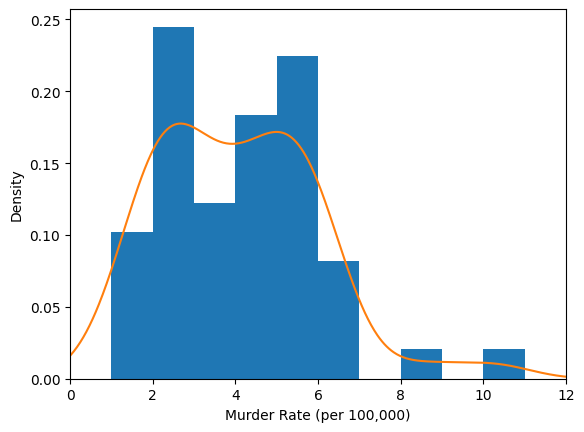

In [11]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')